# ETL on data set for Machine Learning

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Extracting CSV into DataFrame

Extracted csv from kaggle.com (Saved under Resources/Housing.csv) and put into a Pandas DataFrame

In [21]:
house_price_df = pd.read_csv("../Resources/Housing.csv")
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Transforming the Data

In [22]:
# List of all the columns
house_price_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
# Delete unnecessary columns from the DataFrame
# Drop "mainroad" and "furnishingstatus" columns
house_price_df.drop(house_price_df.columns[[5,12]], axis=1, inplace=True)
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,no,no,no,yes,3,no
2,12250000,9960,3,2,2,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no


In [24]:
# Identify incomplete rows
house_price_df.count()

price              545
area               545
bedrooms           545
bathrooms          545
stories            545
guestroom          545
basement           545
hotwaterheating    545
airconditioning    545
parking            545
prefarea           545
dtype: int64

In [25]:
# Drop all rows with missing information (if any)
house_price_df = house_price_df.dropna(how='any')

In [26]:
# Verify dropped rows (confirms there are no rows with missing data)
house_price_df.count()

price              545
area               545
bedrooms           545
bathrooms          545
stories            545
guestroom          545
basement           545
hotwaterheating    545
airconditioning    545
parking            545
prefarea           545
dtype: int64

In [27]:
# Verify data types of columns (object datatypes will need to be transformed with get_dummies for ML)
house_price_df.dtypes 

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
guestroom          object
basement           object
hotwaterheating    object
airconditioning    object
parking             int64
prefarea           object
dtype: object

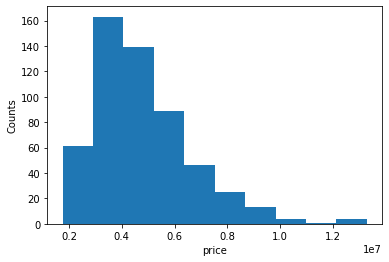

4766729.247706422
4340000.0
0    3500000
1    4200000
Name: price, dtype: int64


In [28]:
# LOOK FOR OUTLIERS IN DATASET
# Determine which measure of central tendency is most appropriate to describe the housing price
plt.hist(house_price_df['price'])
plt.xlabel('price')
plt.ylabel('Counts')
plt.show()
print(house_price_df['price'].mean())
print(house_price_df['price'].median())
print(house_price_df['price'].mode())

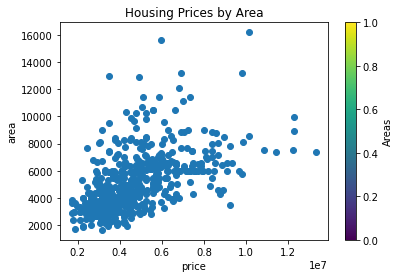

In [33]:
# Create a scatter plot using Matplotlib to look for outliers in housing price
plt.scatter(house_price_df['price'], house_price_df['area'])
clb = plt.colorbar()
clb.set_label("Areas")
plt.xlabel('price')
plt.ylabel('area')
plt.title("Housing Prices by Area")
plt.show()

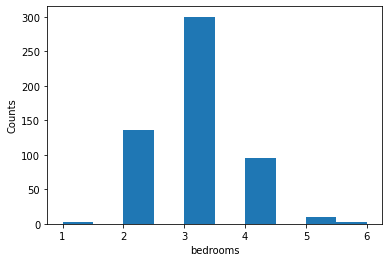

NormaltestResult(statistic=2.701873440567751, pvalue=0.25899753873436415)


In [30]:
# Determine if the number of bedrooms is normally distributed
plt.hist(house_price_df['bedrooms'])
plt.xlabel('bedrooms')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(house_price_df["bedrooms"].sample(100)))

In [31]:
# Determine if there are any potential outliers in the average house price
quartiles = house_price_df['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of housing price is: {lowerq}")
print(f"The upper quartile of housing price is: {upperq}")
print(f"The interquartile range of housing price is: {iqr}")
print(f"The the median of house price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_price = house_price_df.loc[(house_price_df['price'] < lower_bound) | (house_price_df['price'] > upper_bound)]
outlier_price

The lower quartile of housing price is: 3430000.0
The upper quartile of housing price is: 5740000.0
The interquartile range of housing price is: 2310000.0
The the median of house price is: 4340000.0 
Values below -35000.0 could be outliers.
Values above 9205000.0 could be outliers.


,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,no,no,no,yes,3,no
2,12250000,9960,3,2,2,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no
5,10850000,7500,3,3,1,no,yes,no,yes,2,yes
6,10150000,8580,4,3,4,no,no,no,yes,2,yes
7,10150000,16200,5,3,2,no,no,no,no,0,no
8,9870000,8100,4,1,2,yes,yes,no,yes,2,yes
9,9800000,5750,3,2,4,yes,no,no,yes,1,yes


In [36]:
# Remove house prices that all into the potential outlier prices described above:
# Values below -35000.0 could be outliers.
house_price_df = house_price_df.loc[(
    house_price_df["price"] > 35000)]
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,no,no,no,yes,3,no
2,12250000,9960,3,2,2,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no


In [37]:
# Remove house prices that all into the potential outlier prices described above:
# Values above 9205000.0 could be outliers.
house_price_df = house_price_df.loc[(
    house_price_df["price"] < 9205000)]
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
15,9100000,6000,4,1,2,no,yes,no,no,2,no
16,9100000,6600,4,2,2,yes,yes,no,yes,1,yes
17,8960000,8500,3,2,4,no,no,no,yes,2,no
18,8890000,4600,3,2,2,yes,no,no,yes,2,no
19,8855000,6420,3,2,2,no,no,no,yes,1,yes


In [38]:
# Verify dropped rows of outliers
house_price_df.count()

price              530
area               530
bedrooms           530
bathrooms          530
stories            530
guestroom          530
basement           530
hotwaterheating    530
airconditioning    530
parking            530
prefarea           530
dtype: int64

## Load clean data into new csv file

In [39]:
# Push the cleaned DataFrame to a new CSV file
house_price_df.to_csv("../Resources/housing_clean.csv",
                  encoding="utf-8", index=False, header=True)